# Multiplying weighted skymaps

Import a basic skymap:

In [1]:
from gototile.skymap import SkyMap

url = 'https://gracedb.ligo.org/api/superevents/S190521r/files/bayestar.fits.gz'
skymap = SkyMap.from_fits(url)

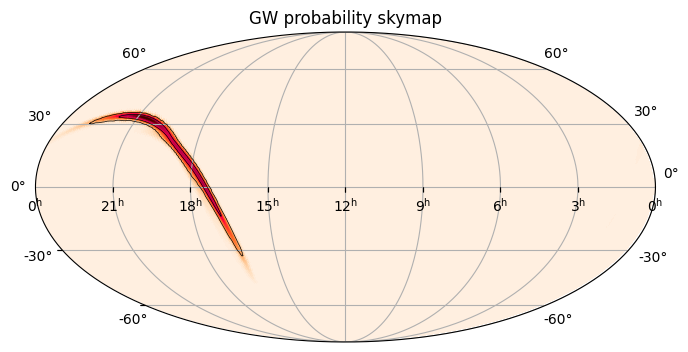

In [2]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(projection='astro hours mollweide')
axes.grid()

skymap.plot_data(axes)
skymap.plot_contours(axes)

axes.set_title('GW probability skymap')

plt.show()

----
### Galaxy maps

Create a skymap from the GLADE catalog:

In [3]:
from gototile.catalog import create_catalog_skymap

galaxy_skymap = create_catalog_skymap(
    'GLADE',
    dist_mean=skymap.header['distmean'],
    dist_err=skymap.header['diststd'],
    nside=256,
)

/home/martin/Dropbox/GOTO/0_code/goto-tile/gototile/catalog.py:165: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  table = pd.read_csv(filepath)
/home/martin/Dropbox/GOTO/0_code/goto-tile/gototile/catalog.py:190: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  weights = hp.smoothing(weights, sigma=np.deg2rad(sigma), verbose=False)


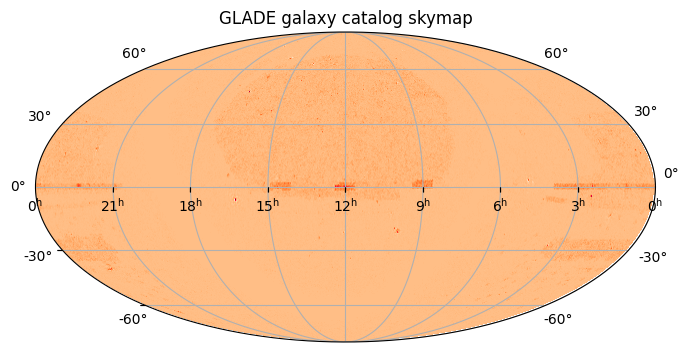

In [4]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(projection='astro hours mollweide')
axes.grid()

galaxy_skymap.plot_data(axes)

axes.set_title('GLADE galaxy catalog skymap')

plt.show()

Multiply the two together:

In [5]:
combined_skymap = skymap * galaxy_skymap

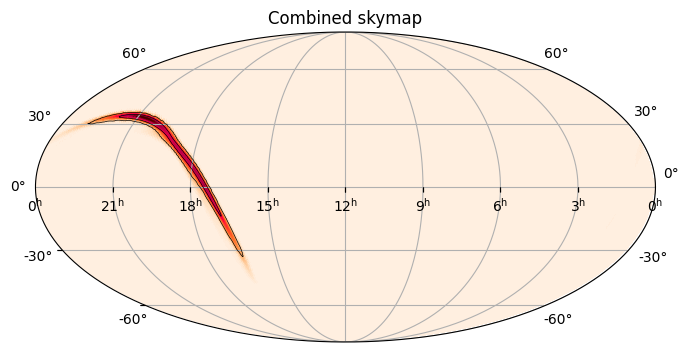

In [6]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(projection='astro hours mollweide')
axes.grid()

combined_skymap.plot_data(axes)
combined_skymap.plot_contours(axes)

axes.set_title('Combined skymap')

plt.show()

There's no obvious difference, unless you really up the weighting of the galaxy map:

In [7]:
combined_skymap2 = skymap * galaxy_skymap**5

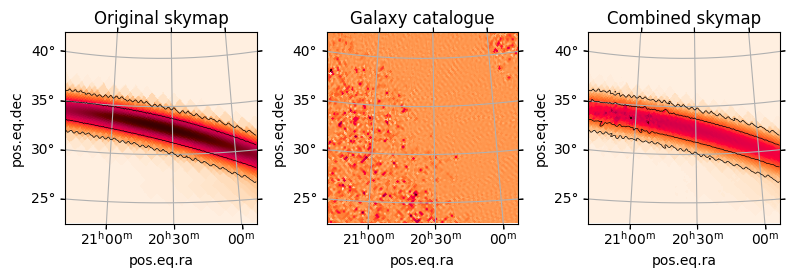

In [8]:
import numpy as np

fig = plt.figure(figsize=(8, 6))

axes = fig.add_subplot(
    131,
    projection='astro zoom',
    center=skymap.coords[np.argmax(skymap.data)],
    radius='10 deg',
)
axes.grid()
skymap.plot_data(axes)
skymap.plot_contours(axes)
axes.set_title('Original skymap')

axes = fig.add_subplot(
    132,
    projection='astro zoom',
    center=skymap.coords[np.argmax(skymap.data)],
    radius='10 deg',
)
axes.grid()
galaxy_skymap.plot_data(axes)
axes.set_title('Galaxy catalogue')

axes = fig.add_subplot(
    133,
    projection='astro zoom',
    center=skymap.coords[np.argmax(skymap.data)],
    radius='10 deg',
)
axes.grid()
combined_skymap2.plot_data(axes)
combined_skymap2.plot_contours(axes)
axes.set_title('Combined skymap')

fig.tight_layout()
plt.show()

In this case it's clear there are so many galaxies per pixel that there's very little difference over the scale of the GW map.

----
### Extinction maps

Create a skymap from the Plank extinction:

In [9]:
from gototile.extinction import create_extinction_skymap

extinction_skymap = create_extinction_skymap(min_weight=0, exp_k=100)
extinction_skymap.rotate('C')  # Set to equatorial coordinates

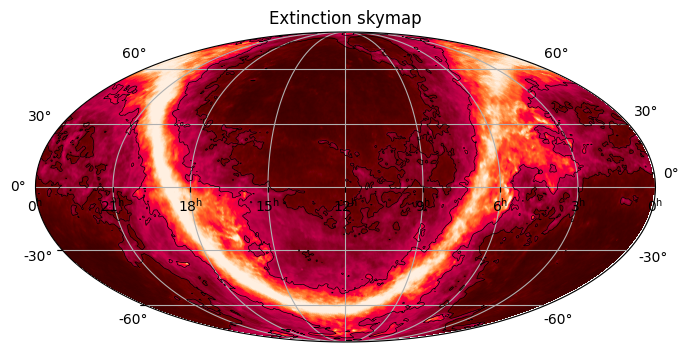

In [10]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(projection='astro hours mollweide')
axes.grid()

extinction_skymap.plot_data(axes)
extinction_skymap.plot_contours(axes)

axes.set_title('Extinction skymap')

plt.show()

Multiply all three skymaps together (can take a while)

In [11]:
combined_skymap = skymap * extinction_skymap

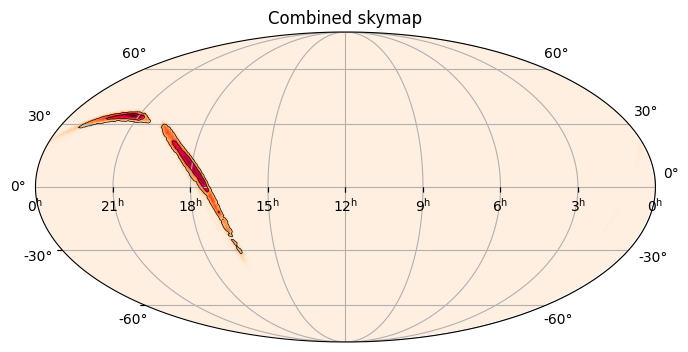

In [12]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(projection='astro hours mollweide')
axes.grid()

combined_skymap.plot_data(axes)
combined_skymap.plot_contours(axes)

axes.set_title('Combined skymap')

plt.show()

Note the gap in the middle of the arc corresponding to the high extinction of the galactic plane.